# Factors Affecting Interactions


### 1. Import required libraries 

In [464]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

### 2. Upload all the datasets

In [465]:
Property_dataset = pd.read_csv("D:/resources/resources/property_data_set.CSV")
Property_interaction = pd.read_csv("D:/resources/resources/property_interactions.CSV")
Property_photos = pd.read_csv("D:/resources/resources/property_photos.tSV",delimiter='\t',encoding='utf-8')

### 3. Observing the Property Dataset


In [466]:
Property_dataset.describe()

,bathroom,floor,total_floor,gym,latitude,longitude,lift,property_age,property_size,swimming_pool,pin_code,rent,deposit
count,28888.000000,28888.000000,28845.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,2.856300e+04,28888.000000,2.888800e+04
mean,1.795867,1.786659,3.518807,0.165951,12.957859,77.605186,0.279009,4.380539,966.338999,0.142585,5.615600e+05,14430.768797,1.233257e+05
std,0.778676,2.361768,3.362536,0.372043,0.219500,0.921003,0.448520,7.458914,619.390016,0.349655,8.979452e+04,9055.133718,1.255028e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000e+00
25%,1.000000,0.000000,2.000000,0.000000,12.906324,77.563295,0.000000,0.000000,600.000000,0.000000,5.600400e+05,8000.000000,5.000000e+04
50%,2.000000,1.000000,3.000000,0.000000,12.953939,77.614568,0.000000,3.000000,900.000000,0.000000,5.600670e+05,12500.000000,1.000000e+05
75%,2.000000,2.000000,4.000000,0.000000,13.009369,77.669235,1.000000,6.000000,1200.000000,0.000000,5.600840e+05,18000.000000,1.500000e+05
max,22.000000,123.000000,38.000000,1.000000,21.176277,80.256293,1.000000,800.000000,40000.000000,1.000000,5.601000e+06,75000.000000,4.200000e+06


In [467]:
Property_dataset.property_id.nunique

<bound method IndexOpsMixin.nunique of 0        ff808081469fd6e20146a5af948000ea
1        ff8080814702d3d10147068359d200cd
2        ff808081470c645401470fb03f5800a6
3        ff808081470c6454014715eaa5960281
4        ff808081474aa867014771a0298f0aa6
                       ...               
28883    ff8081815b1fdda8015b1fe675ae0146
28884    ff8081815b1fdda8015b1ffee8a305d2
28885    ff8081815b1fdda8015b2000369205fd
28886    ff8081815b200540015b20158b0103c9
28887    ff8081815b2007fc015b201c77a20395
Name: property_id, Length: 28888, dtype: object>

*There are 28,888 unique properties*

In [468]:
Property_dataset.isna().sum()

property_id          0
type                 0
activation_date      0
bathroom             0
floor                0
total_floor         43
furnishing           0
gym                  0
latitude             0
longitude            0
lease_type           0
lift                 0
locality             0
parking              0
property_age         0
property_size        0
swimming_pool        0
pin_code           325
rent                 0
deposit              0
building_type       79
dtype: int64

*There are missing values in total_floor, pin_code and building_type*

### 4.Cleaning the Datasets

**1.Clean Property_dataset**


1. For Property_dataset missing values, replace the missing values in each column with the mode of the respective column 

In [469]:
Property_dataset[['total_floor']] = Property_dataset[['total_floor']].fillna(value = Property_dataset['total_floor'].mode()[0])
Property_dataset[['pin_code']] = Property_dataset[['pin_code']].fillna(value = Property_dataset['pin_code'].mode()[0])
Property_dataset[['building_type']] = Property_dataset[['building_type']].fillna(value = Property_dataset['building_type'].mode()[0])

2. To check that there are no missing values in Property_dataset

In [470]:
Property_dataset.isna().sum()

property_id        0
type               0
activation_date    0
bathroom           0
floor              0
total_floor        0
furnishing         0
gym                0
latitude           0
longitude          0
lease_type         0
lift               0
locality           0
parking            0
property_age       0
property_size      0
swimming_pool      0
pin_code           0
rent               0
deposit            0
building_type      0
dtype: int64

**2.Clean Property_photos**

1. For Property_photos, replace \\ by '', add " before title andremove extra ' from end in photos_urls column

In [471]:
Property_photos['photo_urls'] = Property_photos['photo_urls'].str.replace('\\','')
Property_photos['photo_urls'] = Property_photos['photo_urls'].str.replace("{title",'{"title')
Property_photos['photo_urls'] = Property_photos['photo_urls'].str.replace(']"',']')
Property_photos['photo_urls'][0]

'[{"title":"Balcony","name":"IMG_20131006_120837.jpg","imagesMap":{"original":"ff808081469fd6e20146a5af948000ea_65149_original.jpg","thumbnail":"ff808081469fd6e20146a5af948000ea_65149_thumbnail.jpg","medium":"ff808081469fd6e20146a5af948000ea_65149_medium.jpg","large":"ff808081469fd6e20146a5af948000ea_65149_large.jpg"},"displayPic":false},{"title":"Bathroom","name":"IMG_20131006_120734.jpg","imagesMap":{"original":"ff808081469fd6e20146a5af948000ea_63511_original.jpg","thumbnail":"ff808081469fd6e20146a5af948000ea_63511_thumbnail.jpg","medium":"ff808081469fd6e20146a5af948000ea_63511_medium.jpg","large":"ff808081469fd6e20146a5af948000ea_63511_large.jpg"},"displayPic":false},{"title":"Bedroom","name":"IMG_20131006_120643.jpg","imagesMap":{"original":"ff808081469fd6e20146a5af948000ea_16708_original.jpg","thumbnail":"ff808081469fd6e20146a5af948000ea_16708_thumbnail.jpg","medium":"ff808081469fd6e20146a5af948000ea_16708_medium.jpg","large":"ff808081469fd6e20146a5af948000ea_16708_large.jpg"},"di

2. Extracting photo titles names in column- Rooms

In [472]:
def RegExCleaning(x):
    if pd.notna(x):
        m = re.findall('"title":"([^"]*)"',x)
        if sum(pd.Series(m)=='')!=len(m):
            return ','.join(m)
        else:
            return "NA"
    else:
        return "NA"
    
Property_photos['Rooms'] = Property_photos['photo_urls'].apply(lambda x: RegExCleaning(x))
Property_photos.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,property_id,photo_urls,Rooms
0,ff808081469fd6e20146a5af948000ea,"[{""title"":""Balcony"",""name"":""IMG_20131006_12083...","Balcony,Bathroom,Bedroom,Hall,Hall,Kitchen,Other"
1,ff8080814702d3d10147068359d200cd,NaN,NA
2,ff808081470c645401470fb03f5800a6,"[{""title"":""Bedroom"",""name"":""ff808081470c645401...","Bedroom,Balcony,Balcony,Balcony,Bedroom,Bedroo..."
3,ff808081470c6454014715eaa5960281,"[{""title"":""Bedroom"",""name"":""Screenshot_7.jpg"",...","Bedroom,Balcony,Balcony,Balcony,Bedroom,Bedroo..."
4,ff808081474aa867014771a0298f0aa6,"[{""title"":""Other"",""name"":""ff808081474aa8670147...","Other,Outside,Bedroom,Bedroom,Bedroom,Hall,Hall"


3. To get total number of photos upload and unique number of photos for each property

In [473]:
def RegExLen(x):
    if pd.notna(x):
        m = re.findall('"title":"([^"]*)"',x)
        if sum(pd.Series(m)=='')!=len(m):
            return len(m)
        else:
            return np.nan
    else:
        return np.nan
    
def RegExUnique(x):
    if pd.notna(x):
        m = re.findall('"title":"([^"]*)"',x)
        if sum(pd.Series(m)=='')!=len(m):
            return len(list(set(m)))
        else:
            return np.nan
    else:
        return np.nan
    
Property_photos['No of Rooms'] = Property_photos['photo_urls'].apply(lambda x: RegExLen(x))
Property_photos['Unique type of Rooms'] = Property_photos['photo_urls'].apply(lambda x: RegExUnique(x))

Property_photos

,property_id,photo_urls,Rooms,No of Rooms,Unique type of Rooms
0,ff808081469fd6e20146a5af948000ea,"[{""title"":""Balcony"",""name"":""IMG_20131006_12083...","Balcony,Bathroom,Bedroom,Hall,Hall,Kitchen,Other",7.0,6.0
1,ff8080814702d3d10147068359d200cd,NaN,NA,NaN,NaN
2,ff808081470c645401470fb03f5800a6,"[{""title"":""Bedroom"",""name"":""ff808081470c645401...","Bedroom,Balcony,Balcony,Balcony,Bedroom,Bedroo...",12.0,4.0
3,ff808081470c6454014715eaa5960281,"[{""title"":""Bedroom"",""name"":""Screenshot_7.jpg"",...","Bedroom,Balcony,Balcony,Balcony,Bedroom,Bedroo...",9.0,5.0
4,ff808081474aa867014771a0298f0aa6,"[{""title"":""Other"",""name"":""ff808081474aa8670147...","Other,Outside,Bedroom,Bedroom,Bedroom,Hall,Hall",7.0,4.0
...,...,...,...,...,...
28883,ff8081815b1fdda8015b1fe675ae0146,NaN,NA,NaN,NaN
28884,ff8081815b1fdda8015b1ffee8a305d2,"[{""title"":"""",""name"":""files[],""imagesMap"":{""ori...",NA,NaN,NaN
28885,ff8081815b1fdda8015b2000369205fd,"[{""title"":"""",""name"":""files[],""imagesMap"":{""ori...",NA,NaN,NaN
28886,ff8081815b200540015b20158b0103c9,NaN,NA,NaN,NaN


*There are some NaN values in the data which means there are 0 photos uploaded for that property*

4. Replace NaN values with 0

In [475]:
Property_photos[['No of Rooms']] = Property_photos[['No of Rooms']].fillna(value = 0)
Property_photos[['Unique type of Rooms']] = Property_photos[['Unique type of Rooms']].fillna(value = 0)
Property_photos

,property_id,photo_urls,Rooms,No of Rooms,Unique type of Rooms
0,ff808081469fd6e20146a5af948000ea,"[{""title"":""Balcony"",""name"":""IMG_20131006_12083...","Balcony,Bathroom,Bedroom,Hall,Hall,Kitchen,Other",7.0,6.0
1,ff8080814702d3d10147068359d200cd,NaN,NA,0.0,0.0
2,ff808081470c645401470fb03f5800a6,"[{""title"":""Bedroom"",""name"":""ff808081470c645401...","Bedroom,Balcony,Balcony,Balcony,Bedroom,Bedroo...",12.0,4.0
3,ff808081470c6454014715eaa5960281,"[{""title"":""Bedroom"",""name"":""Screenshot_7.jpg"",...","Bedroom,Balcony,Balcony,Balcony,Bedroom,Bedroo...",9.0,5.0
4,ff808081474aa867014771a0298f0aa6,"[{""title"":""Other"",""name"":""ff808081474aa8670147...","Other,Outside,Bedroom,Bedroom,Bedroom,Hall,Hall",7.0,4.0
...,...,...,...,...,...
28883,ff8081815b1fdda8015b1fe675ae0146,NaN,NA,0.0,0.0
28884,ff8081815b1fdda8015b1ffee8a305d2,"[{""title"":"""",""name"":""files[],""imagesMap"":{""ori...",NA,0.0,0.0
28885,ff8081815b1fdda8015b2000369205fd,"[{""title"":"""",""name"":""files[],""imagesMap"":{""ori...",NA,0.0,0.0
28886,ff8081815b200540015b20158b0103c9,NaN,NA,0.0,0.0


### 5. Merging the datasets to create Master dataset

1.To merge Property_dataset and Property_interaction

In [476]:
Master_dataset=pd.merge(Property_dataset,Property_interaction)
Master_dataset.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,request_date
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:10,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,2017-03-10 17:42:34
1,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:10,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,2017-03-09 15:51:17
2,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:10,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,2017-03-10 17:30:22
3,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:10,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,2017-03-11 17:48:46
4,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:43,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678121,...,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,2017-03-30 19:59:15


2. To check if there are no records where request date is less than activation date of property

In [477]:
np.where(Master_dataset.request_date< Master_dataset.activation_date)

(array([], dtype=int64),)

3. To get total no of interactions for each property

In [478]:
Property_interaction_2=Property_interaction.groupby('property_id')['request_date'].count().reset_index()
Property_interaction_2

,property_id,request_date
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,12
2,ff808081470c645401470fb03f5800a6,27
3,ff808081470c6454014715eaa5960281,13
4,ff808081474aa867014771a0298f0aa6,68
...,...,...
22774,ff8081815b1fdda8015b1fe675ae0146,10
22775,ff8081815b1fdda8015b1ffee8a305d2,3
22776,ff8081815b1fdda8015b2000369205fd,2
22777,ff8081815b200540015b20158b0103c9,5


4. Now merge the new Property interaction table with Property dataset

In [479]:
Master_property_dataset=pd.merge(Property_dataset,Property_interaction_2,on='property_id',how='left')
Master_property_dataset

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,request_date
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:10,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,4.0
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:43,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678121,...,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,12.0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:06,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,27.0
3,ff808081470c6454014715eaa5960281,BHK3,2017-03-09 22:16:28,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP,13.0
4,ff808081474aa867014771a0298f0aa6,BHK1,2017-03-15 18:29:13,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28883,ff8081815b1fdda8015b1fe675ae0146,BHK2,2017-03-30 21:42:25,1,0,2.0,SEMI_FURNISHED,0,12.942613,77.621890,...,Koramangala,BOTH,15,1200,0,560030.0,23000,200000,IF,10.0
28884,ff8081815b1fdda8015b1ffee8a305d2,BHK3,2017-03-30 22:14:34,2,3,3.0,SEMI_FURNISHED,0,12.906331,77.591790,...,JP Nagar 5th Phase,BOTH,8,1310,0,560078.0,22000,125000,AP,3.0
28885,ff8081815b1fdda8015b2000369205fd,BHK2,2017-03-30 21:47:17,2,6,14.0,SEMI_FURNISHED,1,12.904363,77.526863,...,Subramanyapura,BOTH,0,975,1,560076.0,12500,50000,AP,2.0
28886,ff8081815b200540015b20158b0103c9,BHK2,2017-03-30 22:30:30,1,1,2.0,SEMI_FURNISHED,0,12.938007,77.629097,...,Koramangala,TWO_WHEELER,5,600,0,560034.0,14000,80000,IF,5.0


4. Now merge the above dataset and Property photos to create a final master dataset

In [483]:
FinalMaster_property_dataset=pd.merge(Master_property_dataset,Property_photos[['property_id','No of Rooms','Unique type of Rooms']],on='property_id',how='left')
FinalMaster_property_dataset

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,request_date,No of Rooms,Unique type of Rooms
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:10,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,2,850,1,560076.0,12000,120000,AP,4.0,7.0,6.0
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:43,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678121,...,1,1233,1,560016.0,20000,150000,AP,12.0,0.0,0.0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:06,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,0,1200,0,560075.0,15000,75000,AP,27.0,12.0,4.0
3,ff808081470c6454014715eaa5960281,BHK3,2017-03-09 22:16:28,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,1,1300,0,560076.0,17000,150000,AP,13.0,9.0,5.0
4,ff808081474aa867014771a0298f0aa6,BHK1,2017-03-15 18:29:13,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,4,450,0,560048.0,6500,40000,IF,68.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28883,ff8081815b1fdda8015b1fe675ae0146,BHK2,2017-03-30 21:42:25,1,0,2.0,SEMI_FURNISHED,0,12.942613,77.621890,...,15,1200,0,560030.0,23000,200000,IF,10.0,0.0,0.0
28884,ff8081815b1fdda8015b1ffee8a305d2,BHK3,2017-03-30 22:14:34,2,3,3.0,SEMI_FURNISHED,0,12.906331,77.591790,...,8,1310,0,560078.0,22000,125000,AP,3.0,0.0,0.0
28885,ff8081815b1fdda8015b2000369205fd,BHK2,2017-03-30 21:47:17,2,6,14.0,SEMI_FURNISHED,1,12.904363,77.526863,...,0,975,1,560076.0,12500,50000,AP,2.0,0.0,0.0
28886,ff8081815b200540015b20158b0103c9,BHK2,2017-03-30 22:30:30,1,1,2.0,SEMI_FURNISHED,0,12.938007,77.629097,...,5,600,0,560034.0,14000,80000,IF,5.0,0.0,0.0


*Now we have final master dataset which contains all the information from all the 3 tables*

### 6.Univariate Analysis

1. Distribution of properties across BHK types

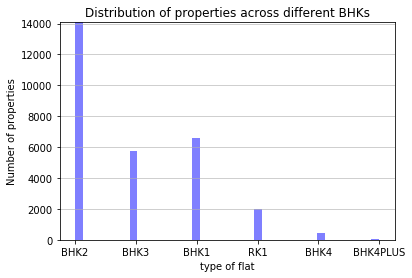

In [482]:
#Observing the distribution of different bhk properties using histogram

n, bins, patches = plt.hist(FinalMaster_property_dataset.type, bins='auto', facecolor='blue', alpha=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('type of flat')
plt.ylabel('Number of properties')
plt.title('Distribution of properties across different BHKs')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

2. To check what % of the properties are having more than 5 bathrooms 

*Note:It is weird to have more than 5 bathrooms in property, so assuming it to be an outlier*

In [484]:
# To check what % of the properties are having more than 5 bathrooms

c=0
for x in FinalMaster_property_dataset.bathroom: 
        # condition check 
        if x>= 5:
            c+= 1 
(c/28888)*100


0.3496261423428413

*We observe that ~0.34% of properties are having more than 5 bathrooms*

3. To check what % of the properties are having more than 15 floors 

*Note:It is weird to have more than 15 floors in property, so assuming it to be an outlier*

In [485]:
# To check what % of the properties are having more than 15 floors

c=0
for x in FinalMaster_property_dataset.floor: 
        # condition check 
        if x>= 15:
            c+= 1 
(c/28888)*100

0.4707837164220438

*We observe that ~0.47% of properties are having more than 15 floors*

3. To see how many properties have age more than 30

In [486]:
FinalMaster_property_dataset[FinalMaster_property_dataset['property_age'] > 30]

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,request_date,No of Rooms,Unique type of Rooms
730,ff8081814de81414014df5a043f55a18,RK1,2017-03-04 12:54:42,1,2,2.0,SEMI_FURNISHED,0,12.919690,77.579291,...,40,500,0,560070.0,4000,15000,AP,36.0,0.0,0.0
1529,ff8081815031a63f0150325d271c08c5,BHK1,2017-03-29 21:16:18,1,1,1.0,FULLY_FURNISHED,0,12.993450,77.583032,...,50,400,0,560020.0,18000,75000,IF,3.0,0.0,0.0
1596,ff8081815061ca1b015062414e56034d,BHK2,2017-03-26 16:32:45,2,0,4.0,SEMI_FURNISHED,0,13.004559,77.562506,...,31,1000,0,560003.0,25000,150000,AP,NaN,0.0,0.0
2150,ff80818151669a4001517c5802ef3b80,BHK2,2017-03-07 12:22:32,2,0,2.0,SEMI_FURNISHED,0,12.992294,77.558530,...,40,600,0,560021.0,10000,80000,IF,13.0,0.0,0.0
4714,ff808181556d89620155719574ae49bd,BHK3,2017-03-15 19:39:04,2,1,1.0,SEMI_FURNISHED,0,12.998019,77.625121,...,40,1400,0,560005.0,16000,200000,IF,4.0,0.0,0.0
6102,ff8081815771e15b0157752d3a97536d,RK1,2017-03-09 22:17:29,1,4,4.0,SEMI_FURNISHED,0,12.996519,77.564183,...,40,250,0,560021.0,5000,20000,IF,30.0,0.0,0.0
7602,ff80818158fd789d0159015516793e75,BHK1,2017-02-14 12:23:35,1,0,0.0,SEMI_FURNISHED,0,12.928375,77.582166,...,35,500,0,560011.0,15000,150000,IH,9.0,0.0,0.0
8053,ff8081815949820301594a82bf241268,BHK1,2017-03-16 20:20:20,1,0,2.0,SEMI_FURNISHED,0,12.949262,77.595190,...,35,700,0,560027.0,15000,75000,IF,12.0,5.0,3.0
8821,ff80818159b44e8a0159b5859ea2134f,BHK1,2017-03-17 18:09:42,1,1,1.0,SEMI_FURNISHED,0,12.975213,77.541636,...,35,1000,0,560040.0,10000,100000,IF,2.0,0.0,0.0
9812,ff80818159fa0f0f015a02909f893d13,BHK3,2017-02-03 20:30:51,2,1,2.0,SEMI_FURNISHED,0,13.027853,77.591465,...,35,1800,0,560032.0,30000,300000,IF,NaN,0.0,0.0


*There are 55 properties whose age is more than 30, assuming it to be outliers*


4. To get how many properties have property size less than 100 and more than 4000

In [487]:
c=0
for x in FinalMaster_property_dataset.property_size: 
        # condition check 
        if x>= 4000 & x<=100:
            c+= 1 
(c/28888)*100


0.6473276100803103

*We observe that ~0.64% of properties are having property size less than 100 and more than 4000*

5. To check if there are any properties which has deposit less than 1000

In [488]:
c=0
for x in FinalMaster_property_dataset.deposit: 
        # condition check 
        if x<1000:
            c+= 1 
c

147

*0.5% of properties have deposit less than 1000, assuming it to be outlier*


6. To check if there are any floor which is more than the total number of rows

In [489]:
np.where(FinalMaster_property_dataset.total_floor< FinalMaster_property_dataset.floor)

(array([  252,   300,   337,   341,   348,   436,   458,   663,   724,
          858,  1036,  1090,  1283,  1909,  2187,  7802,  7878,  9010,
         9863, 10701, 12386, 19825, 20747, 21305, 22111, 22211, 24512,
        26196, 27172], dtype=int64),)

*There are some rows whose floor is greater than the total number of floors in that property, assuming it to be outlier*

6. To drop the above outliers

In [490]:
FinalMaster_property_dataset.drop(FinalMaster_property_dataset[FinalMaster_property_dataset['bathroom'] >5].index,inplace = True)
FinalMaster_property_dataset.drop(FinalMaster_property_dataset[FinalMaster_property_dataset['floor'] >15].index,inplace = True)
FinalMaster_property_dataset.drop(FinalMaster_property_dataset[FinalMaster_property_dataset.total_floor< FinalMaster_property_dataset.floor].index,inplace = True)
FinalMaster_property_dataset.drop(FinalMaster_property_dataset[FinalMaster_property_dataset['property_age']>30].index,inplace=True)
FinalMaster_property_dataset.drop(FinalMaster_property_dataset[FinalMaster_property_dataset['property_size'] <100].index,inplace=True)                                                           
FinalMaster_property_dataset.drop(FinalMaster_property_dataset[FinalMaster_property_dataset['property_size'] >4000].index,inplace=True)                
FinalMaster_property_dataset.drop(FinalMaster_property_dataset[FinalMaster_property_dataset['deposit'] <1000].index,inplace=True)
FinalMaster_property_dataset

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,request_date,No of Rooms,Unique type of Rooms
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:10,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,2,850,1,560076.0,12000,120000,AP,4.0,7.0,6.0
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:43,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678121,...,1,1233,1,560016.0,20000,150000,AP,12.0,0.0,0.0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:06,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,0,1200,0,560075.0,15000,75000,AP,27.0,12.0,4.0
3,ff808081470c6454014715eaa5960281,BHK3,2017-03-09 22:16:28,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,1,1300,0,560076.0,17000,150000,AP,13.0,9.0,5.0
4,ff808081474aa867014771a0298f0aa6,BHK1,2017-03-15 18:29:13,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,4,450,0,560048.0,6500,40000,IF,68.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28883,ff8081815b1fdda8015b1fe675ae0146,BHK2,2017-03-30 21:42:25,1,0,2.0,SEMI_FURNISHED,0,12.942613,77.621890,...,15,1200,0,560030.0,23000,200000,IF,10.0,0.0,0.0
28884,ff8081815b1fdda8015b1ffee8a305d2,BHK3,2017-03-30 22:14:34,2,3,3.0,SEMI_FURNISHED,0,12.906331,77.591790,...,8,1310,0,560078.0,22000,125000,AP,3.0,0.0,0.0
28885,ff8081815b1fdda8015b2000369205fd,BHK2,2017-03-30 21:47:17,2,6,14.0,SEMI_FURNISHED,1,12.904363,77.526863,...,0,975,1,560076.0,12500,50000,AP,2.0,0.0,0.0
28886,ff8081815b200540015b20158b0103c9,BHK2,2017-03-30 22:30:30,1,1,2.0,SEMI_FURNISHED,0,12.938007,77.629097,...,5,600,0,560034.0,14000,80000,IF,5.0,0.0,0.0


7. To see the distribution of properties across different furnishing type

In [491]:
FinalMaster_property_dataset.groupby('furnishing')['property_id'].count().reset_index()

,furnishing,property_id
0,FULLY_FURNISHED,1513
1,NOT_FURNISHED,4774
2,SEMI_FURNISHED,22188


*78% of properties are SemiFurnished, 5% of them are FullyFurnished and 17% are not furnished*

8. To see the how many properties have gym

In [492]:
FinalMaster_property_dataset.groupby('gym')['property_id'].count().reset_index()

,gym,property_id
0,0,23798
1,1,4677


*Only 16% of properties have gym in it*

9. To see the distribution of properties across lease type

In [493]:
FinalMaster_property_dataset.groupby('lease_type')['property_id'].count().reset_index()

,lease_type,property_id
0,ANYONE,12520
1,BACHELOR,1190
2,COMPANY,67
3,FAMILY,14698


*52% of properties can give to only Family, 44% of properties are open to anyone, 4% can be given to bachelors and only 0.2% to company*

10. To see how many properties have lifts 

In [494]:
FinalMaster_property_dataset.groupby('lift')['property_id'].count().reset_index()

,lift,property_id
0,0,20574
1,1,7901


*Only 28% of flats have Lifts in it*

11. To see how many properties have more than 5 floors but no lift

In [495]:
FinalMaster_property_dataset[(FinalMaster_property_dataset['floor'] > 5) & (FinalMaster_property_dataset['lift'] == 0 )]

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,request_date,No of Rooms,Unique type of Rooms
2317,ff80818151b924d00151b9eb1753123f,BHK3,2017-03-22 18:32:30,4,6,6.0,SEMI_FURNISHED,0,12.859134,77.541741,...,2,1775,0,560062.0,20000,100000,AP,NaN,0.0,0.0
2708,ff80818152699afb01526d13a7e50e49,BHK2,2017-03-02 20:03:24,1,10,12.0,SEMI_FURNISHED,0,12.888327,77.460340,...,5,899,0,560060.0,15000,150000,IF,NaN,0.0,0.0
2802,ff808181528ed1bf01528f5b599d00e1,BHK2,2017-03-05 14:54:46,2,10,18.0,SEMI_FURNISHED,0,12.909240,77.663340,...,2,1000,0,560034.0,25000,200000,AP,25.0,0.0,0.0
3581,ff808181539ee4de0153a811729b5716,BHK3,2017-02-22 17:23:39,3,15,31.0,FULLY_FURNISHED,0,13.045120,77.537227,...,3,2100,0,560013.0,31000,300000,AP,NaN,0.0,0.0
4605,ff808181553aee5e015543264699701c,BHK3,2017-03-12 17:54:19,3,15,20.0,SEMI_FURNISHED,0,12.840480,77.675592,...,1,1505,0,560100.0,25000,250000,AP,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26327,ff8081815af0faa6015af6016efa3675,BHK3,2017-03-22 18:41:21,2,7,14.0,SEMI_FURNISHED,0,12.891403,77.582375,...,10,1450,0,560078.0,30000,200000,AP,6.0,0.0,0.0
26434,ff8081815af67c48015af92166ed43b9,BHK3,2017-03-23 10:42:28,2,8,14.0,FULLY_FURNISHED,0,13.021012,77.761477,...,5,1600,0,560067.0,8000,40000,AP,NaN,0.0,0.0
28499,ff8081815b15c304015b1956403e57c9,BHK1,2017-03-29 15:46:01,2,6,7.0,SEMI_FURNISHED,0,18.466072,73.884242,...,5,550,0,411048.0,10000,40000,AP,2.0,0.0,0.0
28711,ff8081815b15c304015b1df97fb2695f,BHK3,2017-03-30 12:36:08,2,7,17.0,SEMI_FURNISHED,0,13.117724,77.577400,...,2,1326,0,560064.0,19000,150000,AP,6.0,0.0,0.0


*0.3% of properties are at more than 5th floor and do not have lift*

12. To get the mean property size of each BHK type 

In [496]:
FinalMaster_property_dataset.groupby('type')['property_size'].mean().reset_index()

,type,property_size
0,BHK1,519.467941
1,BHK2,978.242572
2,BHK3,1534.534655
3,BHK4,2292.554187
4,BHK4PLUS,2641.254237
5,RK1,257.306533


13. To see the distribution of properties across parking facilities

In [497]:
FinalMaster_property_dataset.groupby('parking')['property_id'].count().reset_index()

,parking,property_id
0,BOTH,13593
1,FOUR_WHEELER,982
2,NONE,1256
3,TWO_WHEELER,12644


*48% of properties have both parking facilities, 44% have only 2 wheeler parking, 3% have only 4 wheeler parking and 3% do not have parking facilities*

14. To see how many properties have swimming pool

In [498]:
FinalMaster_property_dataset.groupby('swimming_pool')['property_id'].count().reset_index()

,swimming_pool,property_id
0,0,24473
1,1,4002


*14% of properties have swimming pool in it*

15. To get the mean of rent for each BHK type property

In [499]:
FinalMaster_property_dataset.groupby('type')['rent'].mean().reset_index()

,type,rent
0,BHK1,8115.846486
1,BHK2,14515.614755
2,BHK3,22609.705609
3,BHK4,33270.403941
4,BHK4PLUS,47271.186441
5,RK1,5407.552261


16. To get the mean of rent for each furnishing type

In [500]:
FinalMaster_property_dataset.groupby('furnishing')['rent'].mean().reset_index()

,furnishing,rent
0,FULLY_FURNISHED,18450.998017
1,NOT_FURNISHED,8465.098659
2,SEMI_FURNISHED,15333.260862


17. To get the mean rent for each lease type

In [501]:
FinalMaster_property_dataset.groupby('lease_type')['rent'].mean().reset_index()

,lease_type,rent
0,ANYONE,13477.240655
1,BACHELOR,7301.722689
2,COMPANY,22988.805970
3,FAMILY,15619.729215


18. To get the number of properties across each lease type and BHK type

In [502]:
FinalMaster_property_dataset.groupby(['lease_type','type'])['property_id'].count().reset_index()

,lease_type,type,property_id
0,ANYONE,BHK1,3351
1,ANYONE,BHK2,5571
2,ANYONE,BHK3,2462
3,ANYONE,BHK4,187
4,ANYONE,BHK4PLUS,32
5,ANYONE,RK1,917
6,BACHELOR,BHK1,228
7,BACHELOR,BHK2,103
8,BACHELOR,BHK3,46
9,BACHELOR,BHK4,1


19. To get the top 5 localities which have maximum number of properties

In [503]:
FinalMaster_property_dataset.groupby('locality')['property_id'].nunique().reset_index().nlargest(5, 'property_id')

,locality,property_id
2264,Whitefield,731
955,JP Nagar,647
647,Electronic City,618
1808,Ramamurthy Nagar,518
1478,Marathahalli,485


### 7.Bivariate Analysis

1. To see how BHK type affects no of interactions

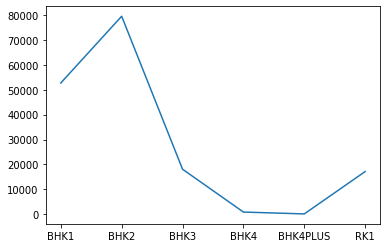

In [505]:
plt.plot(FinalMaster_property_dataset.groupby(['type'])['request_date'].sum())

In [506]:
FinalMaster_property_dataset.groupby(['type'])['request_date'].sum()

type
BHK1        52731.0
BHK2        79559.0
BHK3        18061.0
BHK4          836.0
BHK4PLUS       90.0
RK1         17117.0
Name: request_date, dtype: float64

*78% of interactions are looking for properties with 1BHK or 2BHK*

2. To see the relationship between type of Furnishing and the no of interactions

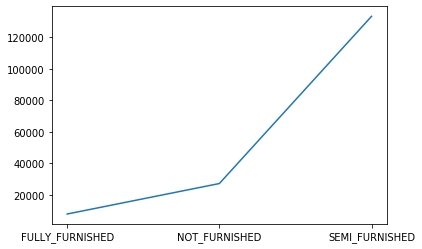

In [507]:
plt.plot(FinalMaster_property_dataset.groupby(['furnishing'])['request_date'].sum())

In [508]:
FinalMaster_property_dataset.groupby(['furnishing'])['request_date'].sum()

furnishing
FULLY_FURNISHED      7808.0
NOT_FURNISHED       27169.0
SEMI_FURNISHED     133417.0
Name: request_date, dtype: float64

*Out of all the interactions, 79% of them are asking for Semi Furnished properties*

3. To see how interactions depends on at which floor is property

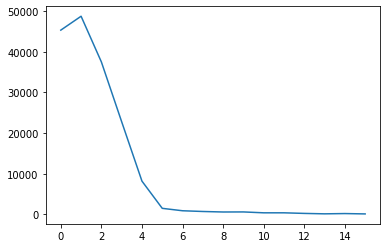

In [509]:
plt.plot(FinalMaster_property_dataset.groupby(['floor'])['request_date'].sum())

In [510]:
FinalMaster_property_dataset[FinalMaster_property_dataset['floor']<4]['request_date'].sum()/FinalMaster_property_dataset['request_date'].sum()*100

91.7099184056439

*92% of interactions are looking for properties till 4th floor*

4. To see how No of uploaded photos affects interactions

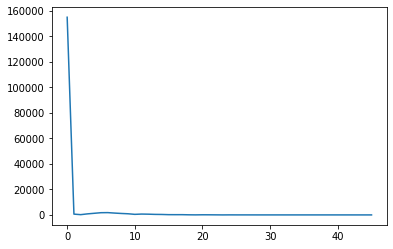

In [511]:
plt.plot(FinalMaster_property_dataset.groupby(['No of Rooms'])['request_date'].sum())

In [512]:
FinalMaster_property_dataset[FinalMaster_property_dataset['No of Rooms']!=0]['request_date'].sum()/FinalMaster_property_dataset['request_date'].sum()*100

8.047792676698695

*8% of interactions have uploaded photos*

5.To see how property size affects interactions

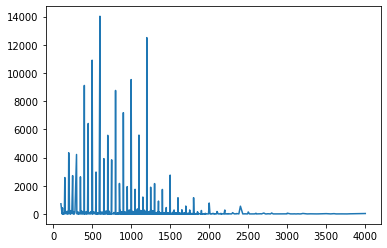

In [513]:
plt.plot(FinalMaster_property_dataset.groupby(['property_size'])['request_date'].sum())

In [460]:
FinalMaster_property_dataset[FinalMaster_property_dataset['property_size']<1500]['request_date'].sum()/FinalMaster_property_dataset['request_date'].sum()*100

92.17727472475266

*92% of interactions are looking for properties with Property size till 1500*

6. To see the correlation between No of interactions with other variables

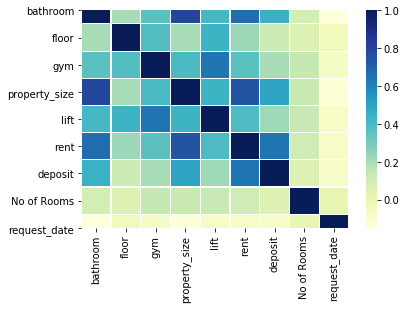

In [448]:
import seaborn as sns 
FinalMaster_property_dataset_2=FinalMaster_property_dataset[['bathroom','floor','gym','property_size','lift','rent','deposit','No of Rooms','request_date']]
corrmat = FinalMaster_property_dataset_2.corr() 
  
f, ax = plt.subplots() 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


*No of interactions is highly correlated with No of uploaded photos,at which floor is the property, if there is gym or not and rent*

Next step:Can perform linear regression where my number of interactions will be dependent variable and other variables will be independent variables to understand how these variables are related to it